# Importing Libraries and Dataset

In [1]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df = pd.read_csv('/content/screentime_analysis.csv')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].min(), df['Date'].max()

(Timestamp('2024-08-01 00:00:00'), Timestamp('2024-08-30 00:00:00'))

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,200,2024-08-16 17:16:48,2024-08-01 00:00:00,2024-08-09 00:00:00,2024-08-18 00:00:00,2024-08-25 00:00:00,2024-08-30 00:00:00,NaN
Usage (minutes),200.0,37.75,1.0,17.0,26.0,51.25,119.0,29.711299
Notifications,200.0,28.735,0.0,1.75,11.5,47.0,147.0,35.801726
Times Opened,200.0,21.63,1.0,4.0,10.0,32.0,99.0,24.27301


In [45]:
df['App'].value_counts()

,count
App,
Instagram,25
X,25
WhatsApp,25
8 Ball Pool,25
Safari,25
Netflix,25
Facebook,25
LinkedIn,25


# Feature Engineering

In [8]:
df['day_of_week'] = df['Date'].dt.dayofweek
df["is_wknd"] = df['Date'].dt.weekday // 4 # It is accepted that Friday is weekend

In [28]:
df_days = df.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})

In [29]:
df_days.reset_index(inplace=True)

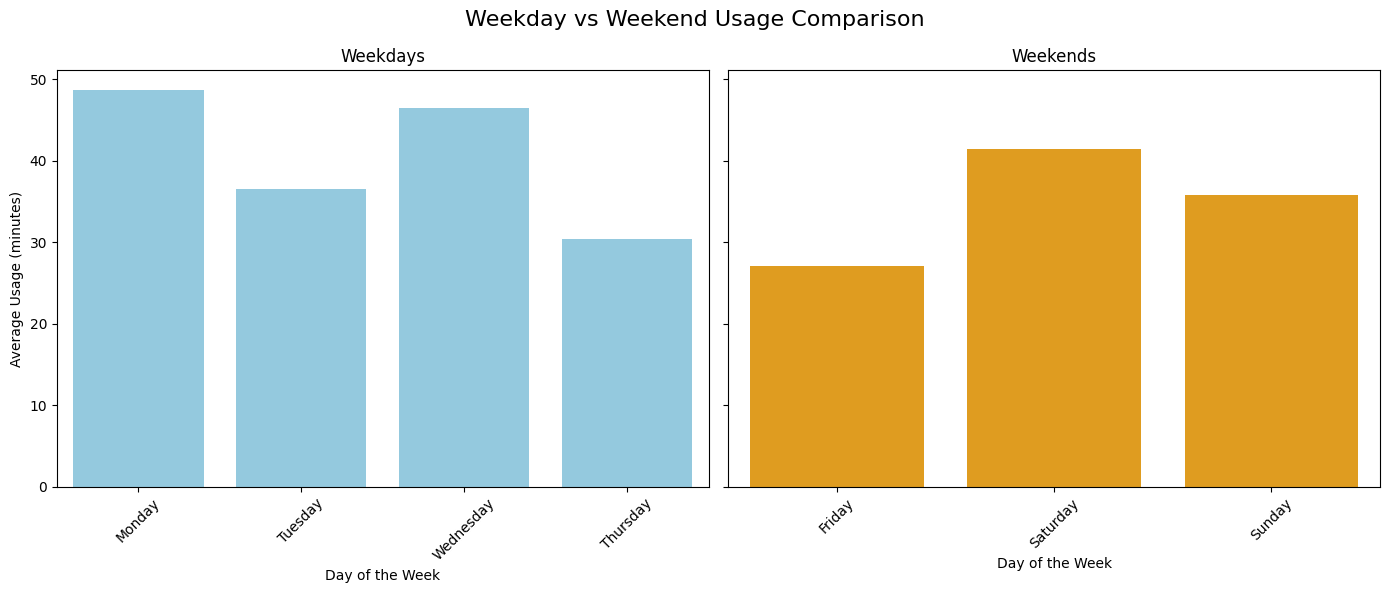

In [30]:
# Map for day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)

# Separate plots for weekdays and weekends
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Weekday vs Weekend Usage Comparison", fontsize=16)

# Weekday data
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='skyblue')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)

# Weekend data
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='orange')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [36]:
df_days

,is_wknd,day_of_week,Usage (minutes),Notifications,Times Opened
0,0,Monday,48.636364,31.363636,19.727273
1,0,Tuesday,36.541667,43.750000,25.500000
2,0,Wednesday,46.500000,31.272727,24.181818
3,0,Thursday,30.406250,19.093750,18.593750
4,1,Friday,27.085714,32.485714,24.285714
5,1,Saturday,41.441176,23.941176,24.294118
6,1,Sunday,35.750000,20.600000,13.000000


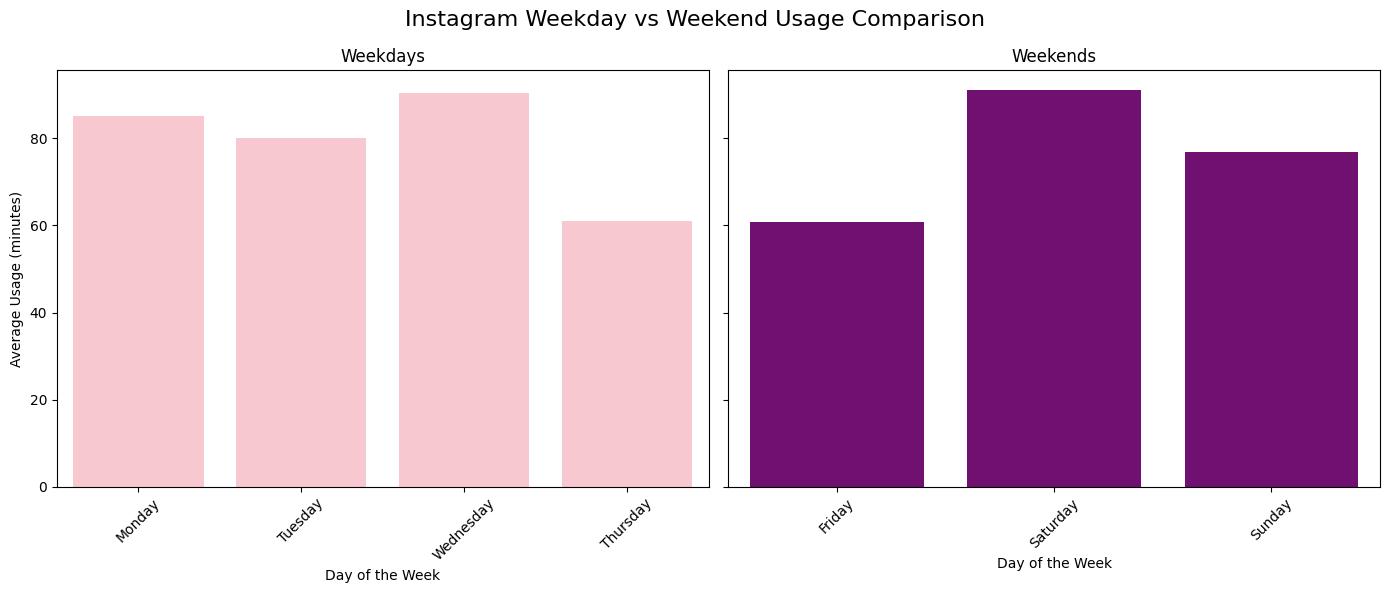

In [42]:
df_insta = df[df['App']=='Instagram']
df_days = df_insta.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
# Map for day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)

# Separate plots for weekdays and weekends
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Instagram Weekday vs Weekend Usage Comparison", fontsize=16)

# Weekday data
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='pink')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)

# Weekend data
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='purple')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


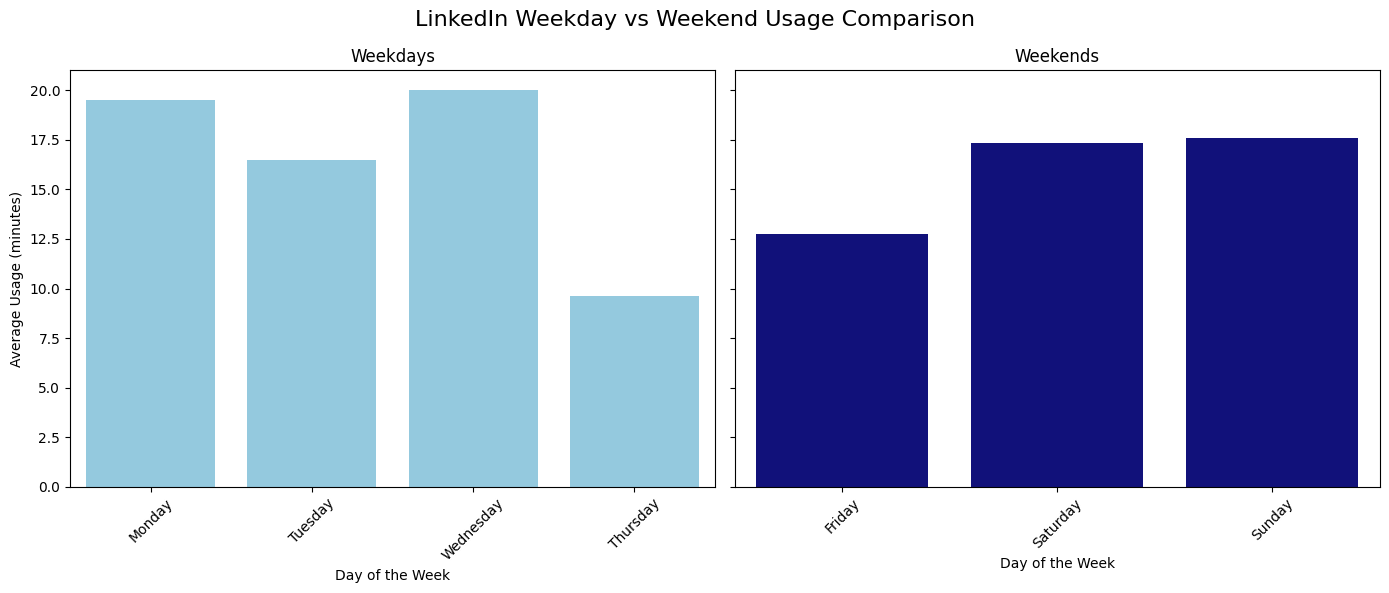

In [48]:
df_linkedin = df[df['App']=='LinkedIn']
df_days = df_linkedin.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
# Map for day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)

# Separate plots for weekdays and weekends
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("LinkedIn Weekday vs Weekend Usage Comparison", fontsize=16)

# Weekday data
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='skyblue')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)

# Weekend data
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='darkblue')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

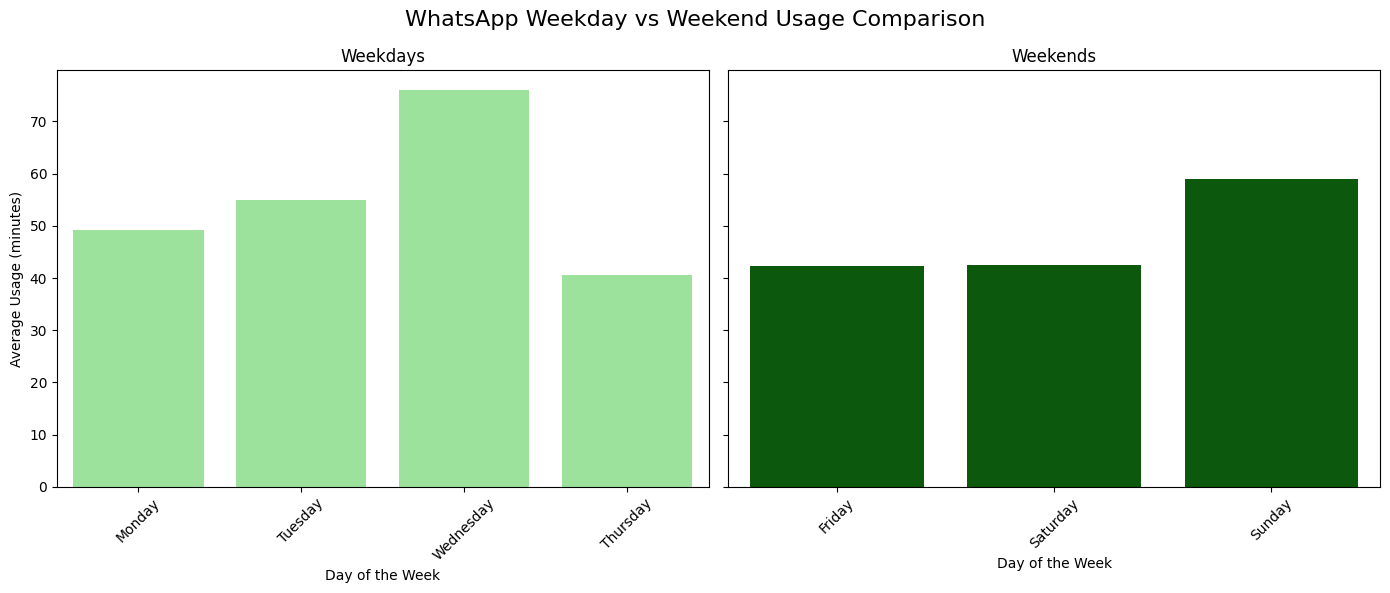

In [52]:
df_whatsapp = df[df['App']=='WhatsApp']
df_days = df_whatsapp.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
# Map for day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)

# Separate plots for weekdays and weekends
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("WhatsApp Weekday vs Weekend Usage Comparison", fontsize=16)

# Weekday data
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='lightgreen')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)

# Weekend data
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='darkgreen')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

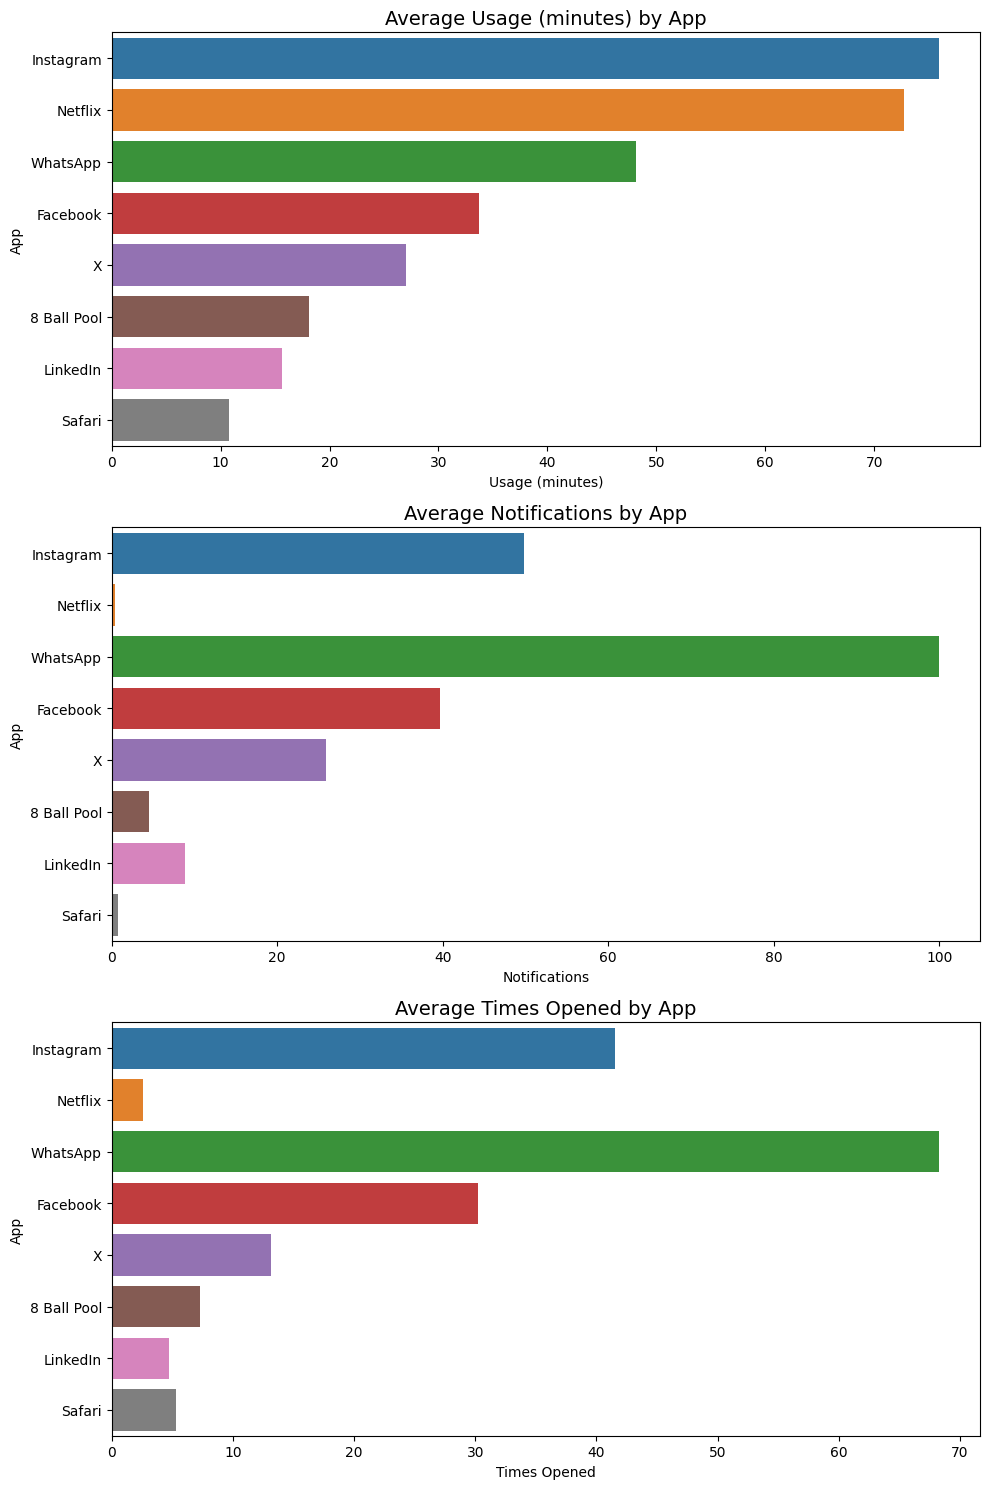

In [51]:
df_app = df.groupby('App').agg({'Usage (minutes)': 'mean',
                                'Notifications': 'mean',
                                'Times Opened': 'mean'}).reset_index().sort_values(by='Usage (minutes)', ascending=False)

unique_apps = df_app['App'].unique()
app_colors = {app: sns.color_palette("tab10")[i % 10] for i, app in enumerate(unique_apps)}

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
metrics = ['Usage (minutes)', 'Notifications', 'Times Opened']

for i, metric in enumerate(metrics):
    sns.barplot(
        data=df_app,
        x=metric,
        y='App',
        ax=axes[i],
        palette=[app_colors[app] for app in df_app['App']]
    )
    axes[i].set_title(f'Average {metric} by App', fontsize=14)
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('App')

plt.tight_layout()
plt.show()
